In [1]:
import pandas as pd
import pystan
import fbprophet

In [2]:
df = pd.read_csv('/Users/sundeep/Learnings/1_PGP_DSBA/Project/11_TimeSeries/Feature-Engineering-Live-sessions-master/monthly-milk-production-pounds.csv')
print(df.head())
print(df.shape)

     Month  Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0  1962-01                                              589.0       
1  1962-02                                              561.0       
2  1962-03                                              640.0       
3  1962-04                                              656.0       
4  1962-05                                              727.0       
(169, 2)


In [3]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [4]:
df.drop(168,axis = 0,inplace = True)

In [5]:
df.columns=['ds','y']

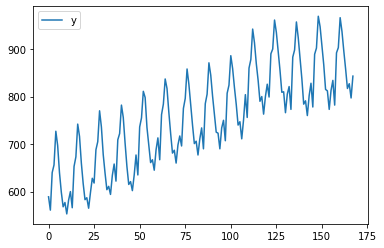

In [6]:
df.plot();

In [7]:
df.head()

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [8]:
df['ds']=pd.to_datetime(df['ds'])

In [9]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [10]:
# Shifting to make it stationary. Repeat the process until data becomes stationary
# To check whether the data becomes stationary or not , we can run dickyfull of test
df['y'] = df['y'] - df['y'].shift(1)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [11]:
df.head()

,ds,y
0,1962-01-01,NaN
1,1962-02-01,-28.0
2,1962-03-01,79.0
3,1962-04-01,16.0
4,1962-05-01,71.0


<AxesSubplot:>

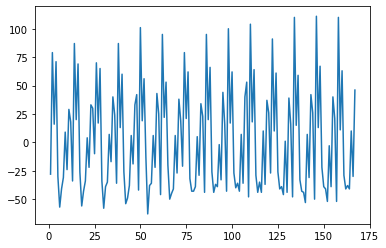

In [12]:
df['y'].plot()

In [13]:
from fbprophet import Prophet

In [14]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [15]:
# intialize the model
model=Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [17]:
future_dates=model.make_future_dataframe(periods=365)

In [18]:
future_dates

,ds
0,1962-01-01
1,1962-02-01
2,1962-03-01
3,1962-04-01
4,1962-05-01
...,...
528,1976-11-26
529,1976-11-27
530,1976-11-28
531,1976-11-29


In [21]:
# Forecast
prediction = model.predict(future_dates)

In [22]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,1.951843,16.867918,37.243461,1.951843,1.951843,24.991722,24.991722,24.991722,24.991722,24.991722,24.991722,0.0,0.0,0.0,26.943564
1,1962-02-01,1.949571,-46.881428,-28.398360,1.949571,1.949571,-40.256764,-40.256764,-40.256764,-40.256764,-40.256764,-40.256764,0.0,0.0,0.0,-38.307193
2,1962-03-01,1.947520,85.333520,103.569472,1.947520,1.947520,93.022637,93.022637,93.022637,93.022637,93.022637,93.022637,0.0,0.0,0.0,94.970157
3,1962-04-01,1.945249,7.192457,25.856725,1.945249,1.945249,14.324959,14.324959,14.324959,14.324959,14.324959,14.324959,0.0,0.0,0.0,16.270208
4,1962-05-01,1.943051,52.534836,71.625343,1.943051,1.943051,60.543050,60.543050,60.543050,60.543050,60.543050,60.543050,0.0,0.0,0.0,62.486101


In [23]:
from fbprophet.diagnostics import cross_validation